In [37]:
# pip install geopandas

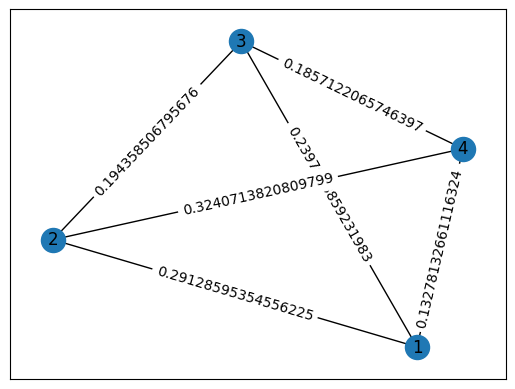

In [38]:
import networkx as nx
import geopy.distance

# create graph
G = nx.Graph()

# add nodes with spatial coordinates
G.add_node(1, pos=(40.741895, -73.989308))
G.add_node(2, pos=(40.739347, -73.988489))
G.add_node(3, pos=(40.740665, -73.986975))
G.add_node(4, pos=(40.742217, -73.987794))

# add edges with weights based on spatial distance
for u in G.nodes():
    for v in G.nodes():
        if u != v:
            dist = geopy.distance.distance(G.nodes[u]['pos'], G.nodes[v]['pos']).km
            G.add_edge(u, v, weight=dist)

# draw graph with spatial coordinates
pos = nx.get_node_attributes(G, 'pos')
nx.draw_networkx(G, pos)
nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'weight'))
plt.show()


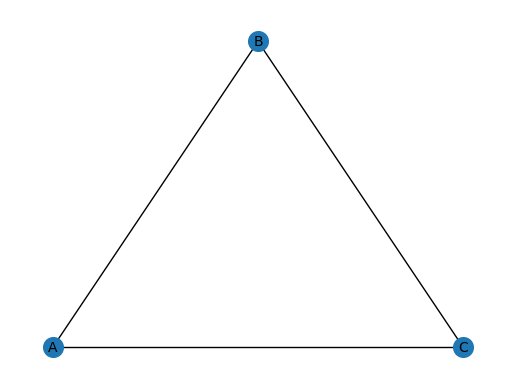

In [39]:
import networkx as nx
import matplotlib.pyplot as plt

# create a graph with spatial coordinates
G = nx.Graph()
G.add_node('A', pos=(0, 0))
G.add_node('B', pos=(1, 1))
G.add_node('C', pos=(2, 0))
G.add_edge('A', 'B')
G.add_edge('B', 'C')
G.add_edge('C', 'A')

# get node positions from spatial coordinates
pos = nx.get_node_attributes(G, 'pos')

# draw network with node labels and spatial coordinates
nx.draw_networkx_nodes(G, pos, node_size=200)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')
plt.axis('off')
plt.show()


In [40]:
import networkx as nx
import folium

# create a graph with spatial coordinates
G = nx.Graph()
G.add_node('A', pos=(51.5074, -0.1278))
G.add_node('B', pos=(48.8566, 2.3522))
G.add_node('C', pos=(40.7128, -74.0060))
G.add_edge('A', 'B')
G.add_edge('A', 'C')
G.add_edge('B', 'C')

# create folium map
m = folium.Map(location=[48.8566, 2.3522], zoom_start=5)

# add edges to map
for edge in G.edges():
    node1 = edge[0]
    node2 = edge[1]
    pos1 = G.nodes[node1]['pos']
    pos2 = G.nodes[node2]['pos']
    folium.PolyLine(locations=[pos1, pos2], color='blue').add_to(m)

# add nodes to map
for node in G.nodes():
    pos = G.nodes[node]['pos']
    folium.Marker(location=pos, icon=folium.Icon(color='red')).add_to(m)

# show map
m
